INFO: Validating data...
INFO: Validating functions...
INFO: Validating nan policy...
INFO: Creating lmfit.Models for the functions...
INFO: Initializing lmfit.Parameters for the functions...
INFO: Setting lmfit fitting/minimization protocols for the functions...
INFO: #############################################################################
INFO: # y(x;) = exponential(x, amplitude, decay) + gaussian(x, amplitude, center, #
INFO: # sigma) + gaussian(x, amplitude, center, sigma)                            #
INFO: #############################################################################


INFO: Fitting .....

INFO: Fitting DONE...
INFO: Parameters fit values:
INFO: Name               Value      Min      Max   Stderr     Vary     Expr Brute_Step
INFO: c0_amplitude_0     99.02     -inf      inf   0.5375     True     None     None
INFO: c0_decay_0         90.95     -inf      inf    1.103     True     None     None
INFO: c1_amplitude_0      4258     -inf      inf    42.38     True     None     None
INFO: c1_center_0          107     -inf      inf   0.1501     True     None     None
INFO: c1_sigma_0         16.67     -inf      inf   0.1605     True     None     None
INFO: c2_amplitude_0      2493     -inf      inf    36.17     True     None     None
INFO: c2_center_0        153.3     -inf      inf   0.1947     True     None     None
INFO: c2_sigma_0         13.81     -inf      inf   0.1868     True     None     None
INFO: Coefficient of determination: R² = 0.99648654 (uniform average)...
INFO: Coefficient of determination: R² = 0.99648654 (variance-weighted)...
INFO: Validating data...
INFO: Val

INFO: Fitting .....

INFO: Fitting DONE...
INFO: Parameters fit values:
INFO: Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
INFO: amplitude_0     6.406        0      200  0.01575     True     None     None
INFO: amplitude_1      6.99        0      200  0.01586     True     None     None
INFO: amplitude_2     7.302        0      200  0.01592     True     None     None
INFO: amplitude_3     6.015        0      200  0.01568     True     None     None
INFO: amplitude_4     9.077        0      200  0.01632     True     None     None
INFO: center_0       0.6803       -2        2 0.0008621     True     None     None
INFO: center_1       0.5045       -2        2  0.00079     True     None     None
INFO: center_2     -0.08261       -2        2 0.0007563     True     None     None
INFO: center_3      0.07383       -2        2 0.0009181     True     None     None
INFO: center_4        0.344       -2        2 0.0006083     True     None     None
INFO: sigma_0        0.2574     0.01     

INFO: Fitting .....

INFO: Fitting DONE...
INFO: Parameters fit values:
INFO: Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
INFO: amplitude_0     6.361        0      200  0.01624     True     None     None
INFO: amplitude_1     6.981        0      200  0.01632     True     None     None
INFO: amplitude_2     7.217        0      200  0.01613     True     None     None
INFO: amplitude_3     6.057        0      200   0.0165     True     None     None
INFO: amplitude_4     9.175        0      200  0.01651     True     None     None
INFO: center_0       0.4152       -2        2 0.0007495     True     None     None
INFO: center_1       0.4117       -2        2 0.000693     True     None     None
INFO: center_2       0.4024       -2        2 0.0006479     True     None     None
INFO: center_3       0.4035       -2        2 0.0008252     True     None     None
INFO: center_4         0.41       -2        2 0.0005457     True     None     None
INFO: sigma_0        0.2543     0.01     

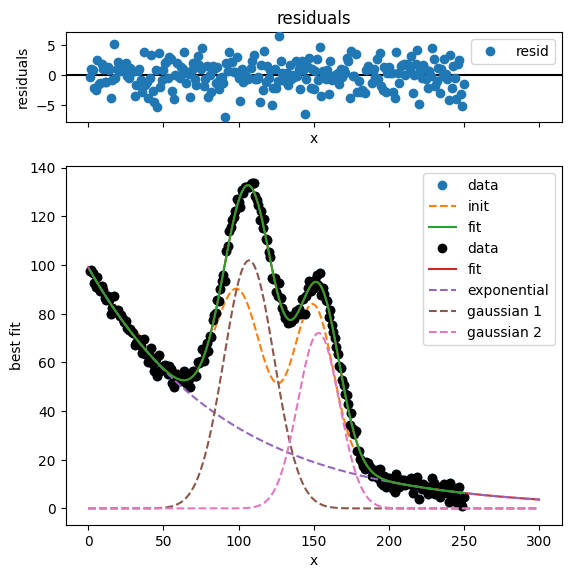

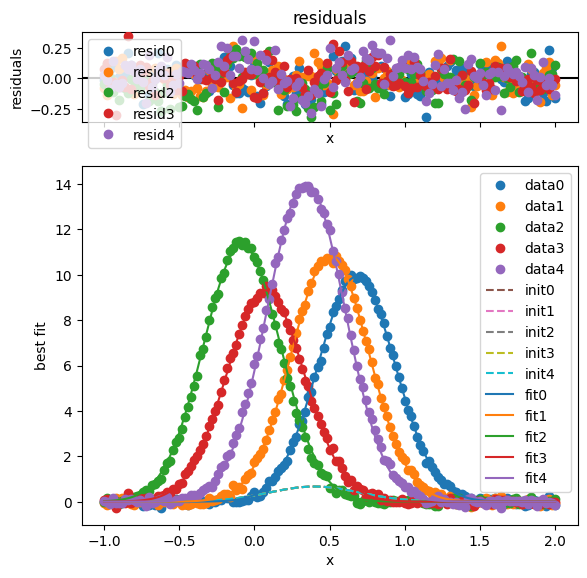

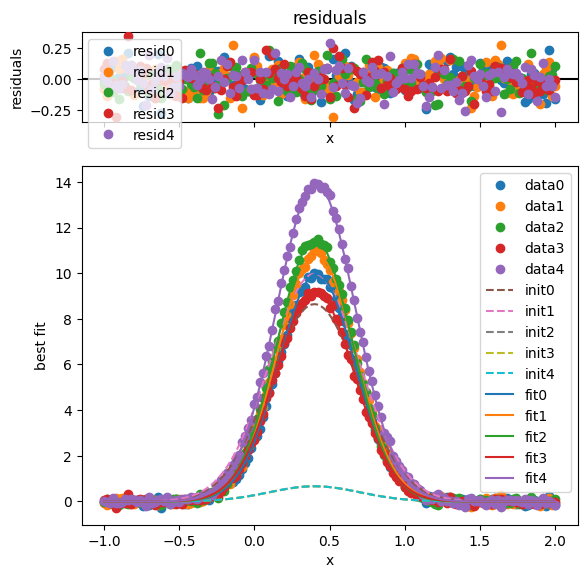

In [ ]:
try:
    from lmfit_global import LmfitGlobal
except (ImportError, ModuleNotFoundError):
    import sys
    sys.path.append('./')
    from lmfit_global import LmfitGlobal
    
import lmfit
import matplotlib.pyplot as plt

INFO: Validating data...
INFO: Validating functions...
INFO: Validating nan policy...
INFO: Creating lmfit.Models for the functions...
INFO: Initializing lmfit.Parameters for the functions...
INFO: Setting lmfit fitting/minimization protocols for the functions...
INFO: #############################################################################
INFO: # y(x;) = exponential(x, amplitude, decay) + gaussian(x, amplitude, center, #
INFO: # sigma) + gaussian(x, amplitude, center, sigma)                            #
INFO: #############################################################################


INFO: Fitting .....

INFO: Fitting DONE...
INFO: Parameters fit values:
INFO: Name               Value      Min      Max   Stderr     Vary     Expr Brute_Step
INFO: c0_amplitude_0     99.02     -inf      inf   0.5375     True     None     None
INFO: c0_decay_0         90.95     -inf      inf    1.103     True     None     None
INFO: c1_amplitude_0      4258     -inf      inf    42.38     True     None     None
INFO: c1_center_0          107     -inf      inf   0.1501     True     None     None
INFO: c1_sigma_0         16.67     -inf      inf   0.1605     True     None     None
INFO: c2_amplitude_0      2493     -inf      inf    36.17     True     None     None
INFO: c2_center_0        153.3     -inf      inf   0.1947     True     None     None
INFO: c2_sigma_0         13.81     -inf      inf   0.1868     True     None     None
INFO: Coefficient of determination: R² = 0.99648654 (uniform average)...
INFO: Coefficient of determination: R² = 0.99648654 (variance-weighted)...


dict_keys(['0'])

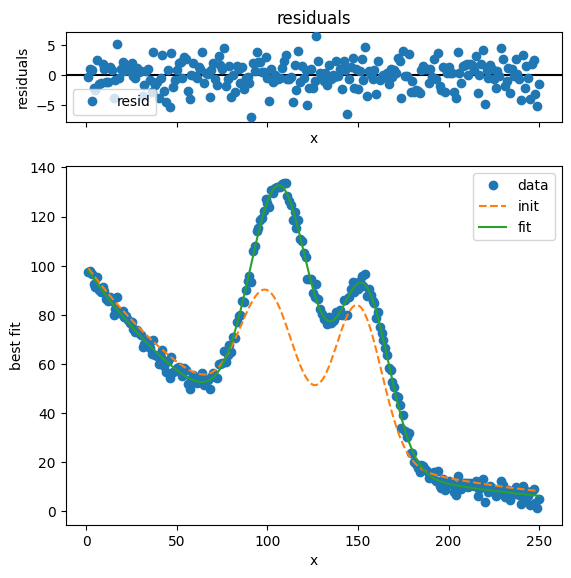

In [3]:
import os
import numpy as np
log2 = np.log(2)
s2pi = np.sqrt(2*np.pi)
s2 = np.sqrt(2.0)
# tiny had been numpy.finfo(numpy.float64).eps ~=2.2e16.
# here, we explicitly set it to 1.e-15 == numpy.finfo(numpy.float64).resolution
tiny = 1.0e-15

def not_zero(value):
    """Return value with a minimal absolute size of tiny, preserving the sign.

    This is a helper function to prevent ZeroDivisionError's.

    Parameters
    ----------
    value : scalar
        Value to be ensured not to be zero.

    Returns
    -------
    scalar
        Value ensured not to be zero.

    """
    return float(np.copysign(max(tiny, abs(value)), value))

def gaussian(x, amplitude=1.0, center=0.0, sigma=1.0):
    """Return a 1-dimensional Gaussian function.

    gaussian(x, amplitude, center, sigma) =
        (amplitude/(s2pi*sigma)) * exp(-(1.0*x-center)**2 / (2*sigma**2))

    """
    return ((amplitude/(max(tiny, s2pi*sigma)))
            * np.exp(-(1.0*x-center)**2 / max(tiny, (2*sigma**2))))


def exponential(x, amplitude=1, decay=1):
    """Return an exponential function.

    exponential(x, amplitude, decay) = amplitude * exp(-x/decay)

    """
    decay = not_zero(decay)
    return amplitude * np.exp(-x/decay)

"""
# --- Here, how THEORY  function can be define
# --- And the initial PARAMETER values
# --- The parameter attribute definitions are:
# value (float): Numerical Parameter value (default is 0)
# vary (bool): Whether the Parameter is varied during a fit (default is True).
# min (float): Lower bound for value (default is -numpy.inf, no lower bound).
# max (float): Upper bound for value (default is +numpy.inf, no upper bound).
# expr (str): Mathematical expression used to constrain the value during the fit (default is '')
"""

theory_func_lst = [
    {
        'func_name': exponential,
        'init_params' : {
            'amplitude': {'value':100.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'decay': {'value':100, },
        },
        'func_kws': {}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
    },
    {
        'func_name': gaussian,
        'init_params' : {
            'amplitude': {'value':2000.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'center': {'value':100, },
            'sigma': {'value':15, },
        },
        'func_kws': {}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
    },
    {
        'func_name': gaussian,
        'init_params' : {
            'amplitude': {'value':2000.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'center': {'value':150, },
            'sigma': {'value':13, },
        },
        'func_kws': {}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
    },
]

function_block = {
    'theory': theory_func_lst,
    'theory_connectors': ['+', '+',],
}

"""
# --- The `theory_connectors` (list of str): 
    A list of binary operators (e.g., '+', '-', '*', '/') that define how to combine 
    the theory functions listed in 'theory'. Each operator connects one function to the next 
    in left-to-right order. For example, ['+', '*'] means: theory[0] + theory[1] * theory[2].

    The number of connectors must be exactly one less than the number of theory functions.
    The ONLY (so-far) supported operators are: '+', '-', '*', '/'.
"""

dpath='./data'  # data path

# --- Load data (skip header) ---
file='NIST_Gauss2.dat' # data
file=os.path.join(
    dpath,
    file
)

dat = np.loadtxt(file)
x = dat[:, 1]
y = dat[:, 0]


xy = np.column_stack([x, y])

data_block = {
    'xy': xy,
    'xrange': None
    }


ITEMS = {
    'data': data_block,
    'functions': function_block,
}

LG = LmfitGlobal(ITEMS)


yerr=np.ones_like(LG.data_y) * 3
numpoints=None
yerr=None
# LG.plot_init(yerr=yerr, numpoints=numpoints)
# LG.plot_dat(yerr=yerr)
# LG.plot_init()
LG.fit(verbose=True)
# LG.plot_fit(yerr=yerr, show_init=True, numpoints=numpoints)
# LG.plot_residuals()
axes = LG.plot(yerr=yerr, show_init=True)


LG._eval_components_per_dataset(i=0).keys()
xfit=np.linspace(0., 300, num=1000)
comps = LG.eval_components(x=xfit)
LG.eval_components().keys()

# LG.report()

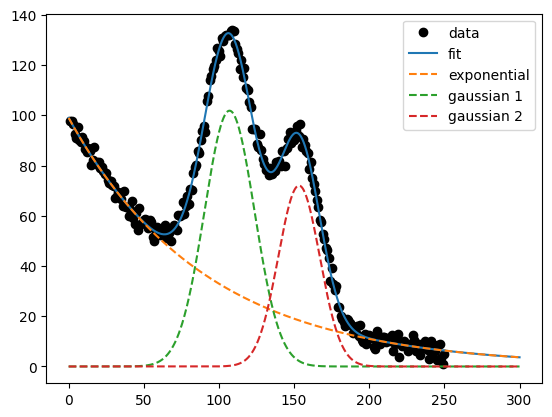

In [4]:
xfit=np.linspace(0., 300, num=1000)
comps = LG.eval_components(x=xfit)
yfit  = LG.eval(x=xfit)

plt.plot(LG.data_x, LG.data_y, 'ko', label='data')
plt.plot(xfit, yfit, '-', label='fit')

plt.plot(xfit, comps['0']['c0'], '--', label='exponential')
plt.plot(xfit, comps['0']['c1'], '--', label='gaussian 1')
plt.plot(xfit, comps['0']['c2'], '--', label='gaussian 2')


plt.legend()

In [5]:
import os
import numpy as np
log2 = np.log(2)
s2pi = np.sqrt(2*np.pi)
s2 = np.sqrt(2.0)
# tiny had been numpy.finfo(numpy.float64).eps ~=2.2e16.
# here, we explicitly set it to 1.e-15 == numpy.finfo(numpy.float64).resolution
tiny = 1.0e-15

def not_zero(value):
    """Return value with a minimal absolute size of tiny, preserving the sign.

    This is a helper function to prevent ZeroDivisionError's.

    Parameters
    ----------
    value : scalar
        Value to be ensured not to be zero.

    Returns
    -------
    scalar
        Value ensured not to be zero.

    """
    return float(np.copysign(max(tiny, abs(value)), value))

def gaussian(x, amplitude=1.0, center=0.0, sigma=1.0):
    """Return a 1-dimensional Gaussian function.

    gaussian(x, amplitude, center, sigma) =
        (amplitude/(s2pi*sigma)) * exp(-(1.0*x-center)**2 / (2*sigma**2))

    """
    return ((amplitude/(max(tiny, s2pi*sigma)))
            * np.exp(-(1.0*x-center)**2 / max(tiny, (2*sigma**2))))


# --- create raw data
# number of points per dataset
numpoints = 151
# number of datasets
ndata = 5

# xy will hold x plus ndata columns of y
xy = np.zeros((numpoints, ndata+1))

# reproducibility
np.random.seed(2021)

# x grid
x = np.linspace(-1, 2, numpoints)
xy[:, 0] = x

for i in range(ndata):
    amplitude = 0.60 + 9.50*np.random.rand()
    center = -0.20 + 1.20*np.random.rand()
    sigma = 0.25 + 0.03*np.random.rand()

    dat = gaussian(x, amplitude, center, sigma) \
          + np.random.normal(scale=0.1, size=x.size)

    xy[:, i+1] = dat



"""
# --- Here, how THEORY  function can be define
# --- And the initial PARAMETER values
# --- The parameter attribute definitions are:
# value (float): Numerical Parameter value (default is 0)
# vary (bool): Whether the Parameter is varied during a fit (default is True).
# min (float): Lower bound for value (default is -numpy.inf, no lower bound).
# max (float): Upper bound for value (default is +numpy.inf, no upper bound).
# expr (str): Mathematical expression used to constrain the value during the fit (default is '')
"""

theory_func_lst = [
    {
        'func_name': gaussian,
        'init_params' : {
            'amplitude': {'value':0.5, 'vary':True, 'min':0.0, 'max':200},
            'center': {'value':0.4, 'vary':True, 'min':-2.0, 'max':2.0},
            'sigma': {'value':0.3, 'vary':True, 'min':0.01, 'max':3.0},
        },
        'func_kws': {}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
    },
]

function_block = {
    'theory': theory_func_lst,
    'theory_connectors': [],
}

"""
# --- The `theory_connectors` (list of str): 
    A list of binary operators (e.g., '+', '-', '*', '/') that define how to combine 
    the theory functions listed in 'theory'. Each operator connects one function to the next 
    in left-to-right order. For example, ['+', '*'] means: theory[0] + theory[1] * theory[2].

    The number of connectors must be exactly one less than the number of theory functions.
    The ONLY (so-far) supported operators are: '+', '-', '*', '/'.
"""

data_block = {
    'xy': xy,
    'xrange': None
    }


ITEMS = {
    'data': data_block,
    'functions': function_block,
}

LG = LmfitGlobal(ITEMS)
par = lmfit.Parameter('sigma_0')
# LG._set_global_params(par)
# LG._set_global_params(['sigma_0'])
# LG.set_global(par)
LG.set_global(['sigma_0'])

# LG.initial_params.pretty_print()

yerr=np.ones_like(LG.data_y) * 3
numpoints=None
yerr=None
# LG.plot_init(yerr=yerr, numpoints=numpoints)
# LG.plot_dat(yerr=yerr)
# LG.plot_init()
LG.fit(verbose=True)
# LG.plot_fit(yerr=yerr, show_init=True, numpoints=numpoints)
# LG.plot_residuals()
axes = LG.plot(yerr=yerr, show_init=True)


LG._eval_components_per_dataset(i=0).keys()
LG.eval_components()
LG.eval_components().keys()

# LG.report() 


INFO: Validating data...
INFO: Validating functions...
INFO: Validating nan policy...
INFO: Creating lmfit.Models for the functions...
INFO: Initializing lmfit.Parameters for the functions...
INFO: Setting lmfit fitting/minimization protocols for the functions...
INFO: #################################################
INFO: # y(x;) = gaussian(x, amplitude, center, sigma) #
INFO: #################################################


NameError: name 'lmfit' is not defined